In [1]:
# Загружаем датасет и подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import textwrap

In [2]:
df = pd.read_csv("Most popular 1000 Youtube videos.csv", encoding='UTF-8-SIG')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        1000 non-null   object
 4   Dislikes     527 non-null    object
 5   Category     982 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [4]:
df.columns

Index(['rank', 'Video', 'Video views', 'Likes', 'Dislikes', 'Category',
       'published'],
      dtype='object')

In [6]:
#возвращает первые 5 строк
display(df.head())
#возвращает последние 5 строк
display(df.tail())

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
1,2,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,David Kushner - Daylight (Official Music Video),"18,558,390","680,732",NaN,Music,2023
4,5,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,547,981,039","44,428,537",NaN,Music,2015


,rank,Video,Video views,Likes,Dislikes,Category,published
995,996,New Champ Kayn/Rhaast Leak for LOL (Moobeat cr...,"847,249","1,857",173,People & Blogs,2017
996,997,Ford Mustang Launch (street),"1,001,605","2,214",27,Autos & Vehicles,2008
997,998,Eminem is gay - The Interview,"2,718,939","43,492",0,Entertainment,2014
998,999,Yakuza OST - Baka Mitai (ばかみたい) Kiryu full ver...,"52,890,986","850,425",0,Gaming,2017
999,1000,What a Twist #memes #shorts #movie,"11,637,337","938,043",NaN,Gaming,2024


In [7]:
#Приведение к нижнему регистру и удаление лишних пробелов в названиях столбцов
df.columns = df.columns.str.strip().str.lower()

In [8]:
df.describe()

,rank,published
count,1000.000000,1000.000000
mean,500.500000,2019.100000
std,288.819436,5.384328
min,1.000000,2005.000000
25%,250.750000,2017.000000
50%,500.500000,2021.000000
75%,750.250000,2024.000000
max,1000.000000,2025.000000


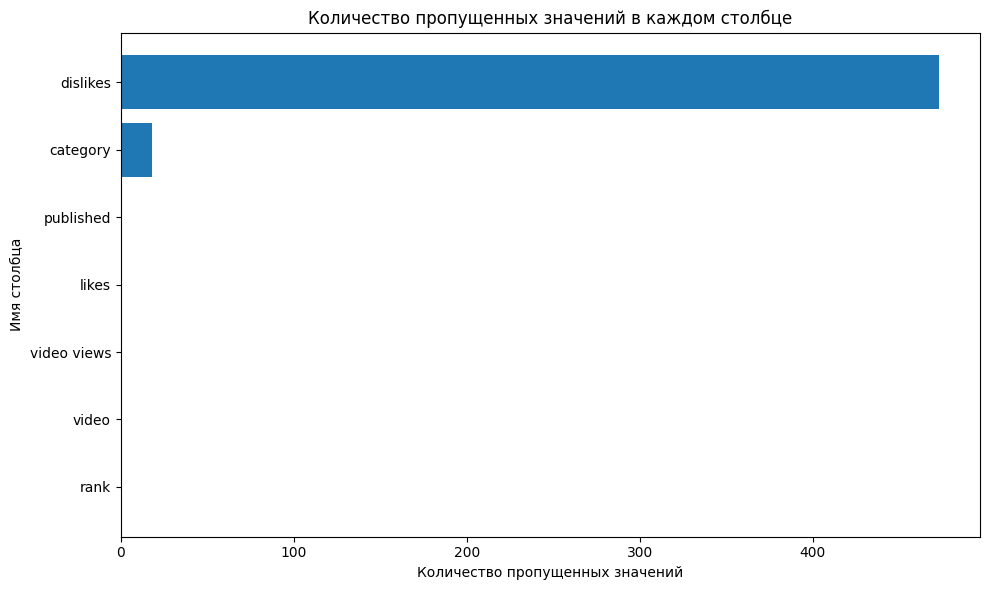

In [9]:
# Создаем список с именами столбцов и количеством пропущенных значений
missing_counts = [df[column].isnull().sum() for column in df.columns]

# Сортируем столбцы в порядке убывания количества пропущенных значений
sorted_columns, sorted_missing_counts = zip(*sorted(zip(df.columns, missing_counts), key=lambda x: x[1], reverse=False))

# Создаем горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
# Используем barh для горизонтальных столбцов
plt.barh(sorted_columns, sorted_missing_counts)  
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Имя столбца')
plt.title('Количество пропущенных значений в каждом столбце')
plt.tight_layout()

# Отображаем график
plt.show()

In [10]:
columns_isnull = [col for col, count in zip(sorted_columns, sorted_missing_counts) if count > 0]
print(f'Названий столбцов, у которых пропуски:')
for col in columns_isnull:
    print('\t' + col)

Названий столбцов, у которых пропуски:
	category
	dislikes


In [11]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

rank - 0
video - 0
video views - 0
likes - 0
dislikes - 473
category - 18
published - 0


In [ ]:
#заполнение пропусков в категориях на any (любая)
df['category'] = df['category'].fillna('any')
#заполнение пропусков в дизлайках на 0
df['dislikes'] = df['dislikes'].fillna(0)

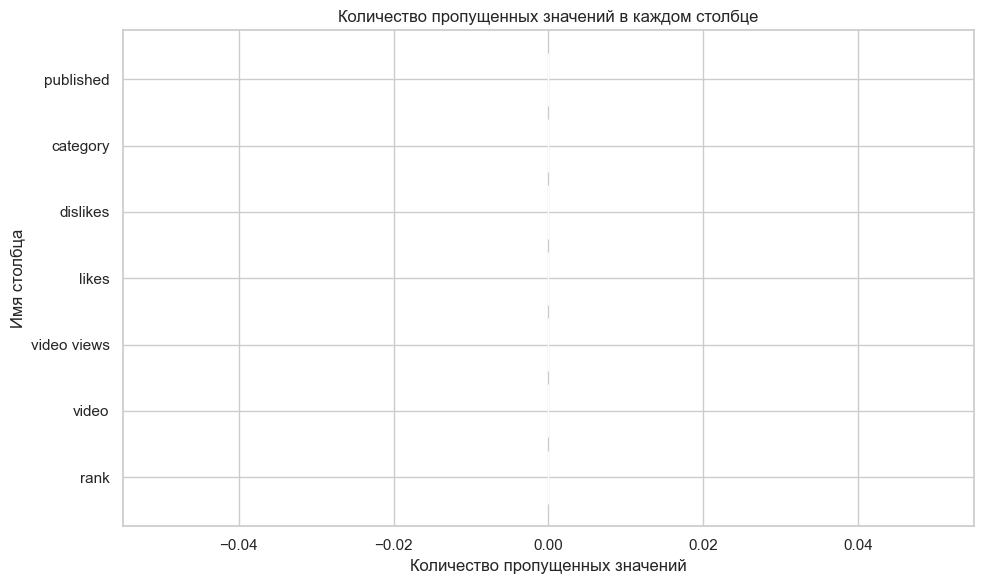

In [36]:
# Проверка
# Создаем список с именами столбцов и количеством пропущенных значений
missing_counts = [df[column].isnull().sum() for column in df.columns]

# Сортируем столбцы в порядке убывания количества пропущенных значений
sorted_columns, sorted_missing_counts = zip(*sorted(zip(df.columns, missing_counts), key=lambda x: x[1], reverse=False))

# Создаем горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
# Используем barh для горизонтальных столбцов
plt.barh(sorted_columns, sorted_missing_counts)  
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Имя столбца')
plt.title('Количество пропущенных значений в каждом столбце')
plt.tight_layout()

# Отображаем график
plt.show()

In [37]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

rank - 0
video - 0
video views - 0
likes - 0
dislikes - 0
category - 0
published - 0


In [38]:
# Количество дублирующих значений
df.duplicated().sum()

np.int64(0)

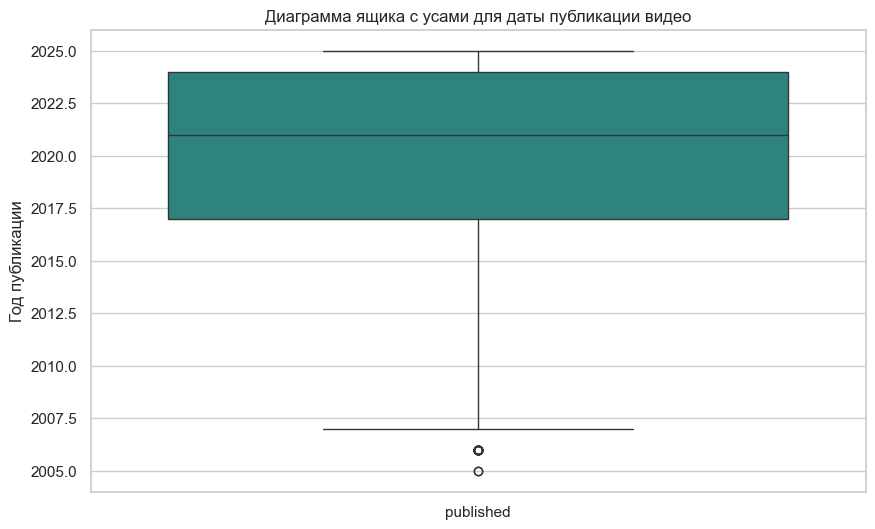

In [39]:
# Диаграмма ящика с усами для "Video views"
sb.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sb.boxplot(data=df[['published']], palette='viridis')
plt.title('Диаграмма ящика с усами для даты публикации видео')
plt.ylabel('Год публикации')
plt.show()

In [40]:
# Получить уникальные категории
unique_categories = df['category'].unique()

print("Уникальные категории:", unique_categories)

Уникальные категории: ['Music' 'any' 'Entertainment' 'People & Blogs' 'News & Politics'
 'Pets & Animals' 'Sports' 'Travel & Events' 'Education' 'Gaming' 'Comedy'
 'Film & Animation' 'Autos & Vehicles' 'Howto & Style'
 'Science & Technology' 'Nonprofits & Activism']


In [45]:
# Создаем словарь для соответствия категорий и их кодов
type_category = {
    'Music': 1,
    'Entertainment': 2,
    'People & Blogs': 3,
    'News & Politics': 4,
    'Pets & Animals': 5,
    'Sports': 6,
    'Travel & Events': 7,
    'Education': 8,
    'Gaming': 9,
    'Comedy': 10,
    'Science & Technology': 11,
    'Nonprofits & Activism': 12,
    'any': 13
}

# Присваиваем числовые коды
df['rating'] = df['category'].map(type_category)

In [46]:
# Подсчет количества типов категорий и сортировка по убыванию
top_category = df['category'].value_counts().nlargest(20).index

# Фильтрация данных
df_top_category = df[df['category'].isin(top_category)]

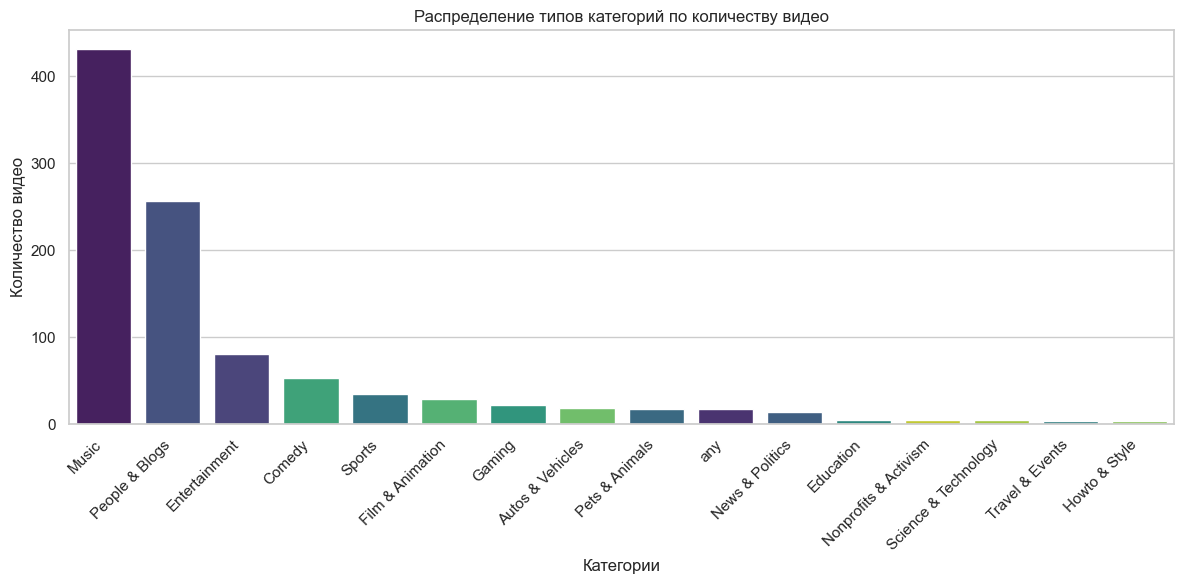

In [49]:
# Установка стиля
sb.set(style="whitegrid")

# Создание диаграммы
plt.figure(figsize=(12, 6))
sb.countplot(x='category', data=df_top_category, order=top_category, hue='category', palette='viridis', legend=False)

# Настройки графика
plt.title('Распределение типов категорий по количеству видео')
plt.xlabel('Категории')
plt.ylabel('Количество видео')
plt.xticks(rotation=45, ha='right')  # Поворот меток X для удобства чтения

# Оптимизация отображения
plt.tight_layout()
plt.show()

In [50]:
df['category'].value_counts()

category
Music                    431
People & Blogs           257
Entertainment             81
Comedy                    53
Sports                    35
Film & Animation          29
Gaming                    22
Autos & Vehicles          19
Pets & Animals            18
any                       18
News & Politics           14
Education                  5
Nonprofits & Activism      5
Science & Technology       5
Travel & Events            4
Howto & Style              4
Name: count, dtype: int64